In [3]:
import pandas as pd
# Cargar el archivo CSV
ruta = 'C:/Users/nat27/Desktop/Desktop/Proyectos/CienciaDatos/learning-strategies/data/raw/DB_Learning_Strategies_English_2025_07.csv'
df = pd.read_csv(ruta, sep=';')
# Tamaño del DataFrame
tamaño = df.shape
print(f"Tamaño del DataFrame: {tamaño}")

Tamaño del DataFrame: (1316, 26)


In [4]:
df.head()  # Mostrar las primeras filas del DataFrame

,Nationality,Gender,Age,CivilStatus,Children,LivingArrangement,UniversityType,GA1,GA2,GA3,...,GA10,GA11,GA12,GA13,GA14,GA15,GA16,GA17,GA18,GA19
0,1,1,19,1,2,2,1,1,1,5,...,1,1,1,1,5,5,1,1,1,1
1,2,1,21,1,2,2,1,2,5,5,...,1,1,4,4,3,5,5,4,4,1
2,1,2,19,1,2,2,1,3,4,5,...,2,2,2,4,3,2,4,4,4,3
3,1,1,18,1,2,2,2,1,3,4,...,3,2,2,3,3,4,5,4,4,4
4,1,2,18,1,2,2,1,1,5,5,...,5,3,5,5,3,2,5,5,5,1


In [ ]:
# Renombrar las columnas de GA1 a GA19 para que sean más descriptivas
df.rename(columns={
    'GA1': 'perf_vs_others',
    'GA2': 'prep_materials',
    'GA3': 'study_space',
    'GA4': 'autonomous_learning',
    'GA5': 'perf_vs_grades',
    'GA6': 'academic_responsibility',
    'GA7': 'self_motivation_words',
    'GA8': 'motivation_difficulties',
    'GA9': 'optimism',
    'GA10': 'motivation_future',
    'GA11': 'positive_academic_outlook',
    'GA12': 'perf_satisfaction',
    'GA13': 'time_management',
    'GA14': 'problem_solving',
    'GA15': 'learn_ability',
    'GA16': 'deep_techniques_1',
    'GA17': 'deep_techniques_2',
    'GA18': 'deep_techniques_3',
    'GA19': 'deep_techniques_4',
}, inplace=True)


In [6]:
# Mostrar las primera filas del DataFrame con las nuevas columnas
df.head() 

,Nationality,Gender,Age,CivilStatus,Children,LivingArrangement,UniversityType,perf_vs_others,prep_materials,study_space,...,motivation_future,positive_academic_outlook,perf_satisfaction,time_management,problem_solving,learn_ability,deep_techniques_1,deep_techniques_2,deep_techniques_3,deep_techniques_4
0,1,1,19,1,2,2,1,1,1,5,...,1,1,1,1,5,5,1,1,1,1
1,2,1,21,1,2,2,1,2,5,5,...,1,1,4,4,3,5,5,4,4,1
2,1,2,19,1,2,2,1,3,4,5,...,2,2,2,4,3,2,4,4,4,3
3,1,1,18,1,2,2,2,1,3,4,...,3,2,2,3,3,4,5,4,4,4
4,1,2,18,1,2,2,1,1,5,5,...,5,3,5,5,3,2,5,5,5,1


In [7]:
# Crear columnas de promedio por factor 
df['avg_performance_perception'] = df[['perf_vs_others', 'perf_vs_grades', 'perf_satisfaction', 'learn_ability']].mean(axis=1)
df['avg_self_regulated_learning'] = df[['prep_materials', 'study_space', 'autonomous_learning', 'academic_responsibility', 'time_management', 'problem_solving']].mean(axis=1)
df['avg_motivation'] = df[['self_motivation_words', 'motivation_difficulties', 'optimism', 'motivation_future', 'positive_academic_outlook']].mean(axis=1)
df['avg_deep_learning'] = df[['deep_techniques_1', 'deep_techniques_2', 'deep_techniques_3', 'deep_techniques_4']].mean(axis=1)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
df.head()

,Nationality,Gender,Age,CivilStatus,Children,LivingArrangement,UniversityType,perf_vs_others,prep_materials,study_space,...,problem_solving,learn_ability,deep_techniques_1,deep_techniques_2,deep_techniques_3,deep_techniques_4,avg_performance_perception,avg_self_regulated_learning,avg_motivation,avg_deep_learning
0,1,1,19,1,2,2,1,1,1,5,...,5,5,1,1,1,1,3.00,3.000000,1.0,1.00
1,2,1,21,1,2,2,1,2,5,5,...,3,5,5,4,4,1,3.25,4.000000,1.0,3.50
2,1,2,19,1,2,2,1,3,4,5,...,3,2,4,4,4,3,2.75,3.833333,1.8,3.75
3,1,1,18,1,2,2,2,1,3,4,...,3,4,5,4,4,4,2.50,3.333333,2.4,4.25
4,1,2,18,1,2,2,1,1,5,5,...,3,2,5,5,5,1,3.25,3.666667,4.6,4.00


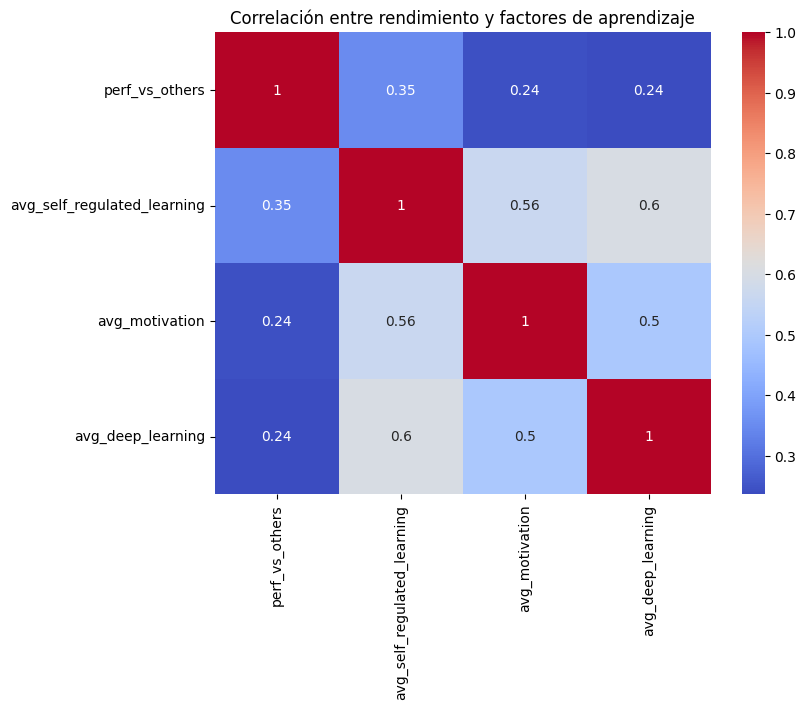

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['perf_vs_others', 'avg_self_regulated_learning', 'avg_motivation', 'avg_deep_learning']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre rendimiento y factores de aprendizaje")
plt.show()